# Introduction
Hello All! This is my first project about data analyst. Bellow, I want to present the data analysis about employee attrition data, maybe it's just basically but i tring.
The structure of this analysis is as follows:
- Load Data
- Statistical information
- Check missing data
- Assumsion key factor using T-Test
- Visualization


# Import libraries

In [1]:
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Data Collection

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Mo ta du lieu chi tiet, phan phoi du lieu

In [3]:
#statistical information
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- Nhìn vào bảng trên ta thấy Attrition có unique=2, nghĩa là chỉ có 2 giá trị Yes & No 

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Khảo sát các feature còn lại(number type) đều có số lượng tương đương nhau 1470 record, & không có trường hợp dữ liệu null/rỗng nào

In [6]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
1233/1470

0.8387755102040816

In [8]:
237/1470

0.16122448979591836

- Khảo sát tỷ lệ Attrition Yes và No thấy No > Yes với No = 84% and Yes = 16%

In [10]:

df[['Attrition', 'Age', 'DistanceFromHome', 'Satisfaction', 'YearsAtCompany', 'EmployeeNumber']].groupby(['Attrition']).mean()

,Age,DistanceFromHome,Satisfaction,YearsAtCompany,EmployeeNumber
Attrition,,,,,
No,37.561233,8.915653,0.822384,7.369019,1027.656123
Yes,33.607595,10.632911,0.759494,5.130802,1010.345992


- Để so sánh mức độ tương quan với Attrition, chọn ngẫu nhiên 1 số feaure như Age, DistanceFromHome, YearsAtCompany, YearsInCurrentRole thấy:
+ Độ tuổi(Age) nhỏ có sẽ ảnh hưởng tới mức tiêu hao (Attrition=Yes)
+ DistanceFromHome lớn cũng có sẽ ảnh hưởng tới mức tiêu hao (Attrition=Yes)
+ YearsAtCompany số năm gắn bó với cty nhỏ hơn sẽ  ảnh hưởng tới mức tiêu hao (Attrition=Yes)

# 1. What are key factors that are playing into current attrition rates?

# Khao sat cac y/c tuong quan đến attrition, ta sử dụng t-test trên Age & DistanceFromHome bên dưới:

In [12]:
# Compare Age between Attrition

# Get Age for Attrition = YES
age_attrition_yes = df.loc[df['Attrition'] == 'Yes']['Age']
age_attrition_yes.sample(5)

1236    36
525     24
798     33
683     25
1444    56
Name: Age, dtype: int64

In [13]:
# Get Age for Attrition = NO
age_attrition_no = df.loc[df['Attrition'] == 'No']['Age']
age_attrition_no.sample(5)

1427    40
822     34
618     25
110     51
609     43
Name: Age, dtype: int64

In [28]:
# 1. Calculate standard deviation Age for Attrition = YES
age_attrition_yes.mean()

33.607594936708864

In [27]:
# 2. Calculate standard deviation Age for Attrition = NO
age_attrition_no.mean()

37.561232765612324

- So sánh tương quan độ tuổi Age với Atrition, kết luận thấy thường người có độ tuổi thấp hơn sẽ có mức tiêu hao(Atrition=Yes) hơn.
- Kiểm chứng bằng T-Test between Atrition YES and NO and use Age, đặt H0: Atrition YES va NO là như nhau không ảnh hưởng bởi Age 

In [17]:
ttest_ind(age_attrition_yes, age_attrition_no, equal_var=False)

Ttest_indResult(statistic=-5.828011853988949, pvalue=1.3797600649439775e-08)

- Kết luận: pvalue < 0.5, không chấp nhận H0 => Attrition Yes & No bị ảnh hưởng bởi Age, statistic < 0 do đó, độ tuổi 20 -> 37 có mức tiêu hao Yes, sẽ dễ  rời bỏ cty hơn

Text(0, 0.5, 'Frequency')

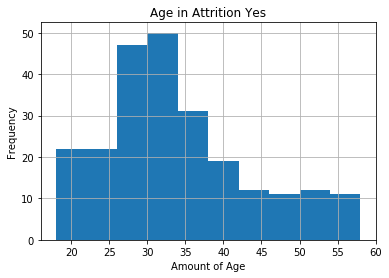

In [18]:
age_attrition_yes.hist()
plt.title('Age in Attrition Yes')
plt.xlabel('Amount of Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

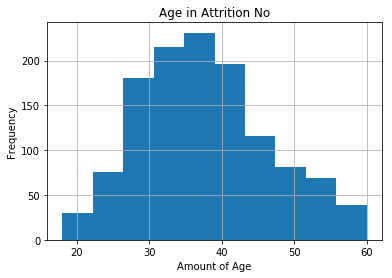

In [19]:
age_attrition_no.hist()
plt.title('Age in Attrition No')
plt.xlabel('Amount of Age')
plt.ylabel('Frequency')

# Compare DistanceFromHome beetwen Attrition Yes & No

In [21]:
DistanceFromHome_attrition_yes = df.loc[df['Attrition'] == 'Yes']['DistanceFromHome']
DistanceFromHome_attrition_no = df.loc[df['Attrition'] == 'No']['DistanceFromHome']

In [30]:
DistanceFromHome_attrition_no.describe()

count    1233.000000
mean        8.915653
std         8.012633
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [31]:
DistanceFromHome_attrition_yes.describe()

count    237.000000
mean      10.632911
std        8.452525
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

- Khảo sát thấy Atrition = Yes có DistanceFromHome trung bình lớn hơn so với DistanceFromHome trung bình có Atrition = No
- Kiểm chứng bằng T-Test between Atrition YES and NO and use DistanceFromHome, đặt H0: Atrition YES va NO là như nhau, không ảnh hưởng bởi DistanceFromHome xa hay gần 

In [32]:
ttest_ind(DistanceFromHome_attrition_yes, DistanceFromHome_attrition_no, equal_var=False)

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

- Kết luận thấy: pvalue < 0.5, Ko chap nhan H0 => Attrition bị ảnh hưởng bời DistanceFromHome, statistic > 0 nen khoang cach xa sẽ dễ rời bỏ cty hơn

Text(0, 0.5, 'Frequency')

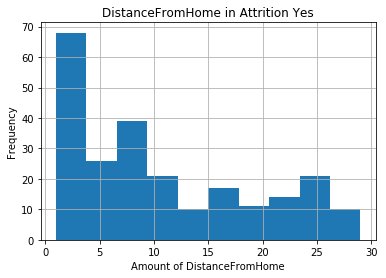

In [25]:
DistanceFromHome_attrition_yes.hist()
plt.title('DistanceFromHome in Attrition Yes')
plt.xlabel('Amount of DistanceFromHome')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

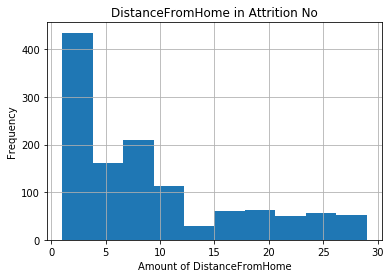

In [26]:
DistanceFromHome_attrition_no.hist()
plt.title('DistanceFromHome in Attrition No')
plt.xlabel('Amount of DistanceFromHome')
plt.ylabel('Frequency')

# 2. What are key factors that are playing into current satisfaction rates?

satisfaction, co 4 gia tri, phai chia ra 2 nhom

Bo sung sung ket luan

- Chia Satisfaction làm 2 nhóm, nhóm 1 có RelationshipSatisfaction <=1(không hài lòng, nhóm 0) và nhóm 2 phần còn lại(hài lòng, nhóm 1)

In [38]:
df['Satisfaction'] = df['RelationshipSatisfaction'].apply(lambda x: 0 if x <= 1 else 1)
df['Satisfaction'].value_counts()

1    1194
0     276
Name: Satisfaction, dtype: int64

- Khảo sát thấy số lượng nhân viên nhóm 0(không hài lòng) < hơn nhóm 1(hài lòng)

In [63]:
df[['Satisfaction','JobLevel', 'PercentSalaryHike', 'YearsWithCurrManager','YearsAtCompany', 'TotalWorkingYears']].groupby(['Satisfaction']).mean()

,JobLevel,PercentSalaryHike,YearsWithCurrManager,YearsAtCompany,TotalWorkingYears
Satisfaction,,,,,
0,2.021739,15.463768,4.387681,7.173913,10.913043
1,2.073702,15.150754,4.061977,6.969849,11.364322


- Để so sánh mức độ tương quan với Satisfaction, thấy các feature JobLevel, PercentSalaryHike, YearsWithCurrManager,	YearsAtCompany hầu như không khác biệt về  số lương trung bình

# Compare JobLevel beetwen Satisfaction 1 & 2

In [40]:
JobLevel_Satisfaction_0 = df.loc[df['Satisfaction'] == 0]['JobLevel']
JobLevel_Satisfaction_1 = df.loc[df['Satisfaction'] == 1]['JobLevel']

In [41]:
JobLevel_Satisfaction_0.describe()

count    276.000000
mean       2.021739
std        1.033739
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: JobLevel, dtype: float64

In [42]:
JobLevel_Satisfaction_1.describe()

count    1194.000000
mean        2.073702
std         1.123368
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

- Kiểm chứng bằng T-Test between Satisfaction và JobLevel, đặt H0: Satisfaction có mức hài lòng như nhau, không bị ảnh hưởng bởi JobLevel

In [43]:
ttest_ind(JobLevel_Satisfaction_0, JobLevel_Satisfaction_1, equal_var=False)

Ttest_indResult(statistic=-0.7401589335061072, pvalue=0.4596000183529686)

- Kết luận: pvalue = 0.459 < 0.5 => Reject H0, nên JobLevel cũng ảnh hưởng tới Satisfaction nhưng không rõ rệt, và JobLevel càng thấp(statistic < 0) thì Satisfaction càng thấp

Text(0, 0.5, 'Frequency')

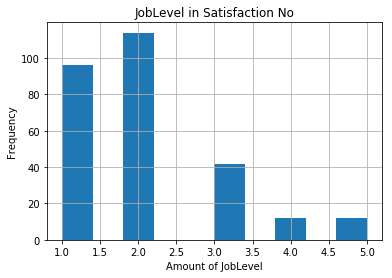

In [50]:
JobLevel_Satisfaction_0.hist()
plt.title('JobLevel in Satisfaction No')
plt.xlabel('Amount of JobLevel')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

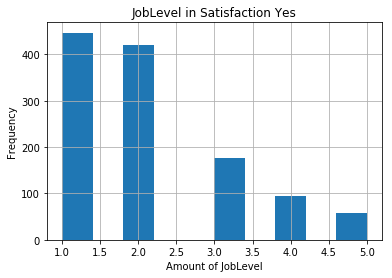

In [56]:
JobLevel_Satisfaction_1.hist()
plt.title('JobLevel in Satisfaction Yes')
plt.xlabel('Amount of JobLevel')
plt.ylabel('Frequency')

# Compare PercentSalaryHike beetwen Satisfaction 1 & 2

In [46]:
PercentSalaryHike_Satisfaction_0 = df.loc[df['Satisfaction'] == 0]['PercentSalaryHike']
PercentSalaryHike_Satisfaction_1 = df.loc[df['Satisfaction'] == 1]['PercentSalaryHike']

In [47]:
PercentSalaryHike_Satisfaction_0.describe()

count    276.000000
mean      15.463768
std        3.715637
min       11.000000
25%       12.000000
50%       14.000000
75%       18.000000
max       25.000000
Name: PercentSalaryHike, dtype: float64

In [48]:
PercentSalaryHike_Satisfaction_1.describe()

count    1194.000000
mean       15.150754
std         3.645993
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

- Kiểm chứng bằng T-Test between PercentSalaryHike và JobLevel, đặt H0: Satisfaction có mức hài lòng như nhau, không bị ảnh hưởng bởi PercentSalaryHike

In [49]:
ttest_ind(PercentSalaryHike_Satisfaction_0, PercentSalaryHike_Satisfaction_1, equal_var=False)

Ttest_indResult(statistic=1.2657513128321918, pvalue=0.20632727515730154)

- Kết luận: pvalue = 0.2 < 0.5 => Reject H0, nên PercentSalaryHike sẽ ảnh hưởng tới Satisfaction, và PercentSalaryHike càng cao(statistic > 0) thì Satisfaction càng cao

Text(0, 0.5, 'Frequency')

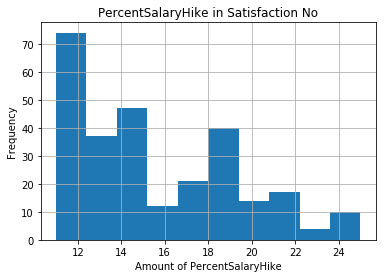

In [54]:
PercentSalaryHike_Satisfaction_0.hist()
plt.title('PercentSalaryHike in Satisfaction No')
plt.xlabel('Amount of PercentSalaryHike')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

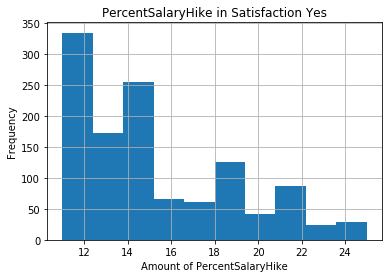

In [55]:
PercentSalaryHike_Satisfaction_1.hist()
plt.title('PercentSalaryHike in Satisfaction Yes')
plt.xlabel('Amount of PercentSalaryHike')
plt.ylabel('Frequency')

# Compare YearsWithCurrManager beetwen Satisfaction 1 & 2

In [64]:
YearsWithCurrManager_Satisfaction_0 = df.loc[df['Satisfaction'] == 0]['TotalWorkingYears']
YearsWithCurrManager_Satisfaction_1 = df.loc[df['Satisfaction'] == 1]['TotalWorkingYears']

In [65]:
YearsWithCurrManager_Satisfaction_0.describe()

count    276.000000
mean      10.913043
std        7.395309
min        0.000000
25%        6.000000
50%       10.000000
75%       13.000000
max       37.000000
Name: TotalWorkingYears, dtype: float64

In [66]:
YearsWithCurrManager_Satisfaction_1.describe()

count    1194.000000
mean       11.364322
std         7.867752
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [67]:
ttest_ind(YearsWithCurrManager_Satisfaction_0, YearsWithCurrManager_Satisfaction_1, equal_var=False)

Ttest_indResult(statistic=-0.9025596064797813, pvalue=0.36726388726188364)